In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade fastai fastcore timm==0.6.13 kaggle pynvml nbdev torchvision -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from pathlib import Path
import sys

if 'google.colab' in str(get_ipython()):

    base_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI')

    data_folder =  Path('/content')

else:
    # Set base folder path for storing files on local machine
    # REPLACE WITH YOUR FOLDER
    # FILL THIS ONLY IF YOU ARE RUNNING ON A LOCAL MACHINE
    print('Path is /Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data')

    base_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI')
    data_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data')


In [4]:
from pathlib import Path
import sys

# Determine the storage location based on the execution environment
# If running on Google Colab, use Google Drive as storage
if 'google.colab' in str(get_ipython()):
    custom_function_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files') # Your Google Drive

    sys.path.append(str(custom_function_folder))
    model_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data') # Google drive folder where you want to save model and logs
    model_folder.mkdir(parents=True, exist_ok=True)
    project_folder = model_folder
    kaggle_api_folder = base_folder/'Data/.kaggle'
    archive_folder = data_folder/'archive'
    archive_folder.mkdir(parents=True, exist_ok=True)

# If running locally, specify a different path
else:
    # Set base folder path for storing files on local machine
    # REPLACE WITH YOUR FOLDER
    # FILL THIS ONLY IF YOU ARE RUNNING ON A LOCAL MACHINE
    print('Path is /Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files')
    custom_function_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files') # Your Google Drive

    sys.path.append(str(custom_function_folder))
    model_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data') # Google drive folder where you want to save model and logs
    model_folder.mkdir(parents=True, exist_ok=True)
    kaggle_api_folder = base_folder/'data/.kaggle'
    archive_folder = data_folder/'archive'
    archive_folder.mkdir(parents=True, exist_ok=True)

In [5]:
! chmod 600 /content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle/kaggle.json
!ls -la /content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle

total 1
-rw------- 1 root root 70 Nov 27 02:27 kaggle.json


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle'

In [7]:
from fastai.vision.all import *
from kaggle import api
from fastcore.parallel import *
import timm
from zipfile import ZipFile

In [8]:
import fastai; fastai.__version__

'2.7.13'

In [9]:
! kaggle competitions download -c inclassplantpathologysmallf23 -p {archive_folder}

 99% 547M/552M [00:09<00:00, 104MB/s] 
100% 552M/552M [00:09<00:00, 58.3MB/s]


In [10]:
!ls -la /content/archive

total 565168
drwxr-xr-x 2 root root      4096 Dec  6 00:21 .
drwxr-xr-x 1 root root      4096 Dec  6 00:21 ..
-rw-r--r-- 1 root root 578718618 Nov 22 11:46 inclassplantpathologysmallf23.zip


In [11]:
file = archive_folder/'inclassplantpathologysmallf23.zip'
with ZipFile(file , 'r') as f:
    filenames = f.namelist()

In [12]:
with ZipFile(file ,'r') as f:
 f.extractall(path = data_folder)

In [13]:
train_path = data_folder/'train'
# test_path = data_folder/'test'

In [14]:
train_files = get_image_files(train_path)

(600, 400)


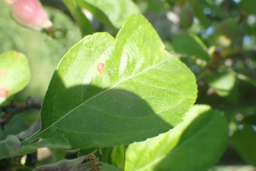

In [15]:
sample_image = PILImage.create(train_files[0])
print(sample_image.size)
sample_image.to_thumb(256)

In [16]:
from fastcore.parallel import *

In [17]:
def get_sizes(image):
    return PILImage.create(image).size

In [18]:
sizes = parallel(get_sizes, train_files, progress=True)

In [19]:
pd.Series(sizes).value_counts()

(600, 400)    12409
(600, 450)      627
(600, 600)        3
(450, 600)        2
(600, 337)        1
dtype: int64

In [20]:
df = pd.read_csv(data_folder/'train.csv')
df.head()

,image,labels
0,train_image_1.jpg,powdery_mildew
1,train_image_2.jpg,scab
2,train_image_3.jpg,scab frog_eye_leaf_spot
3,train_image_4.jpg,powdery_mildew
4,train_image_5.jpg,complex


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13042 entries, 0 to 13041
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   13042 non-null  object
 1   labels  13042 non-null  object
dtypes: object(2)
memory usage: 203.9+ KB


In [22]:
df.iloc[0:10, ]

,image,labels
0,train_image_1.jpg,powdery_mildew
1,train_image_2.jpg,scab
2,train_image_3.jpg,scab frog_eye_leaf_spot
3,train_image_4.jpg,powdery_mildew
4,train_image_5.jpg,complex
5,train_image_6.jpg,rust
6,train_image_7.jpg,scab frog_eye_leaf_spot
7,train_image_8.jpg,scab frog_eye_leaf_spot
8,train_image_9.jpg,frog_eye_leaf_spot
9,train_image_10.jpg,frog_eye_leaf_spot


In [23]:
# def get_x(df): return str(small_train_images) + '/' + (df['image'])
def get_x(df):
  return data_folder/'train/train'/df['image']
def get_y(df):
  return df['labels'].split(' ')
dblock = DataBlock(get_x= get_x,
                   get_y = get_y,
                   splitter = RandomSplitter(seed = 42))
dsets = dblock.datasets(df)
dsets.train[15]

(Path('/content/train/train/train_image_10535.jpg'), ['rust', 'complex'])

In [24]:
import gc
def free_memory():
    """
    Attempts to free up memory by deleting variables and running Python's garbage collector.
    """
    gc.collect()
    for device_id in range(torch.cuda.device_count()):
        torch.cuda.set_device(device_id)
        torch.cuda.empty_cache()
    gc.collect()

In [25]:
from fastai.vision.data import DataBlock, ImageBlock, MultiCategoryBlock, RandomSplitter
from fastai.vision import *

# Define your DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(400, method='squish'),
    batch_tfms=aug_transforms(size=128, min_scale=0.75, do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1,
                      max_lighting=0.2, max_warp=0.2,
                      p_affine=0.75, p_lighting=0.75)  )

# Create datasets
dsets = dblock.datasets(df)

dsets.train[3]

(PILImage mode=RGB size=600x400, TensorMultiCategory([0., 0., 0., 0., 0., 1.]))

In [26]:
import os
os.cpu_count()

2

In [27]:
dls = dblock.dataloaders(df, bs = 64)

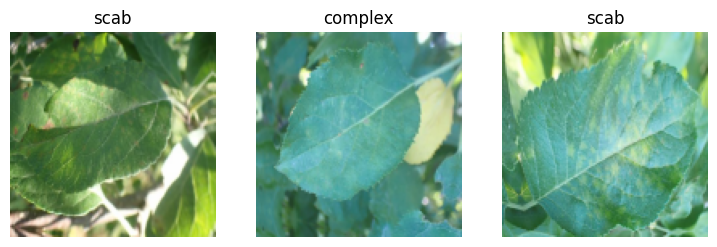

In [28]:
# free_memory()
dls.train.show_batch(max_n=3)

In [29]:
dls.device

device(type='cuda', index=0)

In [30]:
model_folder

Path('/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data')

In [ ]:
from fastai.vision.learner import create_body, cnn_config, num_features_model
from torchvision.models import mobilenet_v2

def create_body_custom(model, cut=None, body_fn=None):
    if body_fn is None: body_fn = _default_meta[ModelType.Cadene]
    model = body_fn(model)
    if cut is None: return model
    return nn.Sequential(*list(model.children())[:cut])

mobilenet_split = lambda m: (create_body_custom(m[0][0], cut=-1), m[1])

arch = mobilenet_v2
body = create_body_custom(arch(pretrained=True))
nf = num_features_model(nn.Sequential(*body.children()))
head = create_head(nf, dls.c, lin_ftrs=[1024], ps=0.5, concat_pool=False)
model = nn.Sequential(body, head)
learn = Learner(dls, model, metrics=[F1ScoreMulti(thresh=0.5)])


ImportError: ignored

In [ ]:
model_list = timm.list_models(pretrained=True)
len(model_list)

770

In [ ]:
model_list

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_rw_224',
 'coatnet_1_rw_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_rw_224',
 'coatnet_rmlp_1_rw_224',
 'coatnet_rmlp_2_rw_224',
 'coatnet_rmlp_nano_rw_224',
 'coatnext_nano_rw_224',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_atto',
 'convnext_atto_

In [ ]:
from fastai.vision import models
def get_ensemble(model_list):
    ens_model = []  # Empty list to store the trained learner objects for the ensemble
    learning_rate = 0.03  # Single learning rate for all models
    ens_weights = []
    for i in range(len(model_list)):
      print(f'-----Training model: {model_list[i]}--------')
      # model = timm.create_model(model_list[i])
      learn = vision_learner(dls, model_list[i], metrics = [F1ScoreMulti(thresh = 0.5)], path = model_folder).to_fp16()
      learn.fine_tune(10, learning_rate)
      model_filename = f'ensem_model_{model_list[i]}.weights'
      learn.save(model_filename)
      f1_score = learn.validate()[1]
      ens_model.append(learn)
      ens_weights.append(f1_score)
      print(f'-----Training of model {i + 1} complete. F1-score: {f1_score:.4f}----')
    ens_weights = [w / sum(ens_weights) for w in ens_weights]
    return ens_model,ens_weights

In [31]:
models = ['resnet34','resnet50','resnet26d','resnet50d','resnet101d','resnetv2_50d','resnetv2_101d','resnetv2_152d','wide_resnet50_2','wide_resnet101_2','tv_resnet34','xception41','densenet121','densenet169','densenet201','densenet161','efficientnet_b0','efficientnet_b1','efficientnet_b2','efficientnet_b3','inception_resnet_v2','inception_v3','inception_v4']

In [32]:
len(models)

23

In [33]:
# Filter the list of models to only include pre-trained models
pretrained_models = []
for model_name in models:
    if model_name in timm.list_models(pretrained=True):
        pretrained_models.append(model_name)

pretrained_models = list(pretrained_models)
print(pretrained_models)

['resnet34', 'resnet50', 'resnet26d', 'resnet50d', 'resnet101d', 'wide_resnet50_2', 'wide_resnet101_2', 'tv_resnet34', 'xception41', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'inception_resnet_v2', 'inception_v3', 'inception_v4']


In [34]:
len(pretrained_models)

20

In [ ]:
pretrained_models[14:]

['efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'inception_resnet_v2',
 'inception_v3',
 'inception_v4']

In [ ]:
get_ensemble(['efficientnet_b2',''])

-----Training model: efficientnet_b2--------


epoch,train_loss,valid_loss,f1_score,time
0,0.449509,0.340610,0.478810,01:38


epoch,train_loss,valid_loss,f1_score,time
0,0.283113,0.252240,0.647807,01:41
1,0.219489,0.189971,0.772339,01:41
2,0.173428,0.146800,0.802368,01:41
3,0.147996,0.137674,0.830717,01:40
4,0.123243,0.129531,0.847181,01:41
5,0.109292,0.127620,0.852839,01:42
6,0.094114,0.126488,0.862046,01:46
7,0.090508,0.125276,0.864336,01:52
8,0.081106,0.123173,0.862379,01:47
9,0.076361,0.125839,0.862986,01:50


-----Training of model 1 complete. F1-score: 0.8630----
-----Training model: --------


RuntimeError: ignored

In [ ]:
ens_model,weight = get_ensemble(pretrained_models)

-----Training model: resnet26d--------


epoch,train_loss,valid_loss,f1_score,time
0,0.384550,0.280639,0.619550,01:33


epoch,train_loss,valid_loss,f1_score,time
0,0.215138,0.177783,0.766589,01:33
1,0.169336,0.144798,0.803602,01:32
2,0.149520,0.141216,0.813422,01:32
3,0.131204,0.126125,0.827522,01:33
4,0.112515,0.115298,0.865855,01:33
5,0.103997,0.111719,0.866247,01:33
6,0.088468,0.110428,0.866120,01:31
7,0.075998,0.111264,0.872917,01:33
8,0.070581,0.109127,0.874214,01:33
9,0.065858,0.108364,0.876745,01:37


-----Training of model 1 complete. F1-score: 0.8767----
-----Training model: resnet50d--------


epoch,train_loss,valid_loss,f1_score,time
0,0.423179,0.328972,0.508858,01:35


epoch,train_loss,valid_loss,f1_score,time
0,0.275125,0.240022,0.666332,01:36
1,0.218771,0.187804,0.764531,01:37
2,0.173662,0.155200,0.808940,01:37
3,0.142446,0.139199,0.833417,01:36
4,0.139188,0.125054,0.843713,01:36
5,0.118761,0.129127,0.856235,01:35
6,0.102415,0.116103,0.866241,01:34
7,0.098785,0.115707,0.872005,01:34
8,0.088759,0.113973,0.868177,01:34
9,0.083731,0.113263,0.868610,01:34


-----Training of model 2 complete. F1-score: 0.8686----
-----Training model: resnet101d--------


epoch,train_loss,valid_loss,f1_score,time
0,0.429894,0.370705,0.472742,01:37


epoch,train_loss,valid_loss,f1_score,time
0,0.283524,0.251054,0.667045,01:41
1,0.221110,0.212750,0.706161,01:43
2,0.172941,0.156733,0.804414,01:40
3,0.144330,0.165173,0.832990,01:41
4,0.130313,0.133049,0.835748,01:43
5,0.114491,0.123574,0.863289,01:43
6,0.099413,0.115704,0.857864,01:45
7,0.088945,0.113852,0.865050,01:43
8,0.084596,0.112683,0.873512,01:44
9,0.080827,0.111159,0.873693,01:42


-----Training of model 3 complete. F1-score: 0.8737----
-----Training model: wide_resnet50_2--------


epoch,train_loss,valid_loss,f1_score,time
0,0.432710,0.332147,0.513225,01:35


epoch,train_loss,valid_loss,f1_score,time
0,0.269823,0.228419,0.693955,01:37
1,0.201936,0.177560,0.772478,01:38
2,0.162943,0.141995,0.833409,01:37
3,0.136603,0.134737,0.835900,01:38
4,0.124409,0.130194,0.847746,01:39
5,0.101733,0.119053,0.867532,01:37
6,0.095904,0.114281,0.861357,01:38
7,0.079859,0.111178,0.869448,01:38
8,0.072736,0.111709,0.869093,01:37
9,0.073497,0.111889,0.871050,01:39


-----Training of model 4 complete. F1-score: 0.8711----
-----Training model: wide_resnet101_2--------


epoch,train_loss,valid_loss,f1_score,time
0,0.329937,0.267400,0.699924,01:43


epoch,train_loss,valid_loss,f1_score,time
0,0.177660,0.155472,0.817969,01:47
1,0.164110,0.168621,0.790936,01:48
2,0.161757,0.160890,0.820528,01:49
3,0.144818,0.149127,0.812793,01:50
4,0.132180,0.129044,0.849347,01:49
5,0.119582,0.128157,0.851559,01:48
6,0.102465,0.114381,0.877257,01:47
7,0.085662,0.109429,0.879160,01:48
8,0.077689,0.104856,0.881221,01:48
9,0.070300,0.104981,0.881669,01:46


-----Training of model 5 complete. F1-score: 0.8817----
-----Training model: tv_resnet34--------


epoch,train_loss,valid_loss,f1_score,time
0,0.347094,0.242638,0.668051,01:39


epoch,train_loss,valid_loss,f1_score,time
0,0.194358,0.171283,0.800661,01:33
1,0.162806,0.155673,0.817206,01:33
2,0.161444,0.137042,0.829967,01:33
3,0.141260,0.131093,0.846374,01:34
4,0.131670,0.124839,0.849410,01:34
5,0.114128,0.126377,0.846564,01:34
6,0.097285,0.115191,0.852823,01:33
7,0.088065,0.109067,0.867029,01:32
8,0.080219,0.105838,0.882530,01:33
9,0.073373,0.107017,0.878381,01:33


-----Training of model 6 complete. F1-score: 0.8784----
-----Training model: xception41--------


epoch,train_loss,valid_loss,f1_score,time
0,0.489439,0.381809,0.381381,01:39


epoch,train_loss,valid_loss,f1_score,time
0,0.295526,0.254767,0.618672,01:43
1,0.213392,0.202746,0.752885,01:40
2,0.177843,0.152147,0.804751,01:42
3,0.145033,0.153155,0.821361,01:42
4,0.127917,0.136341,0.840824,01:41
5,0.115615,0.127264,0.849134,01:40
6,0.097627,0.123304,0.856044,01:44
7,0.089528,0.124887,0.862717,01:42
8,0.074139,0.132273,0.860737,01:40
9,0.074230,0.126129,0.860504,01:42


-----Training of model 7 complete. F1-score: 0.8605----
-----Training model: vgg16_bn--------


epoch,train_loss,valid_loss,f1_score,time


RuntimeError: ignored

In [ ]:
ens_model,weight = get_ensemble(pretrained_models[7:])

-----Training model: densenet121--------


epoch,train_loss,valid_loss,f1_score,time
0,0.529044,0.410945,0.093141,01:43


epoch,train_loss,valid_loss,f1_score,time
0,0.432663,0.397787,0.082521,01:46
1,0.414098,0.383523,0.117227,01:45
2,0.395047,0.360982,0.243956,01:48
3,0.378490,0.345762,0.288069,01:48
4,0.368946,0.337015,0.340898,01:48
5,0.355962,0.327979,0.384754,01:43
6,0.353717,0.321391,0.434674,01:46
7,0.350457,0.319507,0.425832,01:48
8,0.347654,0.318805,0.430746,01:46
9,0.346165,0.318998,0.420366,01:45


-----Training of model 1 complete. F1-score: 0.4204----
-----Training model: densenet169--------


epoch,train_loss,valid_loss,f1_score,time
0,0.352032,0.209505,0.720189,01:49


epoch,train_loss,valid_loss,f1_score,time
0,0.235118,0.197057,0.735052,01:57
1,0.219856,0.183376,0.757757,01:54
2,0.200299,0.169124,0.777746,01:54
3,0.188226,0.160415,0.793135,01:53
4,0.174253,0.156449,0.794698,01:56
5,0.168504,0.148250,0.811351,01:53
6,0.158912,0.143849,0.819230,01:51
7,0.162484,0.142636,0.819604,01:52
8,0.154850,0.140758,0.818626,01:52
9,0.159264,0.141775,0.817000,01:53


-----Training of model 2 complete. F1-score: 0.8170----
-----Training model: densenet201--------


epoch,train_loss,valid_loss,f1_score,time
0,0.355860,0.229535,0.689237,01:52


epoch,train_loss,valid_loss,f1_score,time
0,0.230848,0.199150,0.738988,01:59
1,0.221634,0.184570,0.766160,01:57
2,0.201727,0.171384,0.782266,01:58
3,0.190620,0.158736,0.794936,01:58
4,0.172047,0.153664,0.803875,01:59
5,0.168799,0.147708,0.815343,01:58
6,0.164437,0.144703,0.822082,01:59
7,0.159600,0.142615,0.825264,01:59
8,0.154208,0.141914,0.824363,02:01
9,0.155463,0.141409,0.826918,02:01


-----Training of model 3 complete. F1-score: 0.8269----
-----Training model: densenet161--------


epoch,train_loss,valid_loss,f1_score,time
0,0.341319,0.195667,0.747324,01:49


epoch,train_loss,valid_loss,f1_score,time
0,0.228432,0.184308,0.766484,01:54
1,0.210102,0.173234,0.786361,01:57
2,0.195120,0.161983,0.809661,01:54
3,0.179842,0.150012,0.819575,01:53
4,0.171605,0.144686,0.830881,01:55
5,0.163112,0.138215,0.831451,01:55
6,0.164427,0.137178,0.836595,01:57
7,0.157676,0.134189,0.838108,02:02
8,0.149991,0.133404,0.835449,01:57


epoch,train_loss,valid_loss,f1_score,time
0,0.228432,0.184308,0.766484,01:54
1,0.210102,0.173234,0.786361,01:57
2,0.195120,0.161983,0.809661,01:54
3,0.179842,0.150012,0.819575,01:53
4,0.171605,0.144686,0.830881,01:55
5,0.163112,0.138215,0.831451,01:55
6,0.164427,0.137178,0.836595,01:57
7,0.157676,0.134189,0.838108,02:02
8,0.149991,0.133404,0.835449,01:57


In [ ]:
ens_model,weight = get_ensemble(pretrained_models[14:])

-----Training model: efficientnet_b3--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_ra2-cf984f9c.pth


epoch,train_loss,valid_loss,f1_score,time
0,0.452699,0.354825,0.424584,01:48


epoch,train_loss,valid_loss,f1_score,time
0,0.306046,0.289478,0.557944,01:51
1,0.244560,0.216383,0.708767,01:50
2,0.189249,0.178842,0.756359,01:53
3,0.162346,0.162746,0.795888,01:53
4,0.143900,0.146307,0.797060,01:51
5,0.127940,0.140454,0.811735,01:53
6,0.116125,0.131543,0.842611,01:54
7,0.105161,0.130819,0.848442,01:52
8,0.100349,0.127180,0.847191,01:55
9,0.092940,0.127237,0.847813,01:54


-----Training of model 1 complete. F1-score: 0.8478----
-----Training model: efficientnet_b4--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b4_ra2_320-7eb33cd5.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_ra2_320-7eb33cd5.pth


epoch,train_loss,valid_loss,f1_score,time
0,0.485337,0.397579,0.322399,01:52


epoch,train_loss,valid_loss,f1_score,time
0,0.371321,0.342682,0.394433,01:58
1,0.343841,0.327452,0.452076,01:56
2,0.314147,0.299722,0.496896,01:59
3,0.287729,0.275867,0.585724,01:59
4,0.259000,0.242621,0.672405,01:56
5,0.227667,0.230172,0.687366,01:54
6,0.214718,0.211522,0.718675,01:51
7,0.202538,0.206769,0.730773,01:54
8,0.193658,0.201727,0.743283,01:51
9,0.190422,0.204320,0.735447,01:52


-----Training of model 2 complete. F1-score: 0.7354----
-----Training model: inception_resnet_v2--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/inception_resnet_v2-940b1cd6.pth" to /root/.cache/torch/hub/checkpoints/inception_resnet_v2-940b1cd6.pth


epoch,train_loss,valid_loss,f1_score,time
0,0.449479,nan,0.454583,01:54


epoch,train_loss,valid_loss,f1_score,time
0,0.279646,nan,0.654260,02:04
1,0.230674,nan,0.741612,02:04
2,0.194048,0.171833,0.774374,02:04
3,0.171989,0.176730,0.786036,02:05
4,0.146899,0.171454,0.826455,02:06
5,0.130751,0.179244,0.829141,02:07
6,0.112727,0.141681,0.847007,02:06
7,0.093990,0.195382,0.838657,02:06
8,0.087066,0.168111,0.847214,02:08
9,0.076865,0.180791,0.843515,02:05


-----Training of model 3 complete. F1-score: 0.8435----
-----Training model: inception_v3--------


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


epoch,train_loss,valid_loss,f1_score,time
0,0.503524,0.398439,0.345183,01:39


epoch,train_loss,valid_loss,f1_score,time
0,0.338913,0.279578,0.593850,01:40
1,0.255868,0.212534,0.697824,01:44
2,0.200346,0.180581,0.781071,01:43
3,0.176905,0.156706,0.814777,01:44
4,0.159881,0.151506,0.818541,01:44
5,0.140447,0.144552,0.832545,01:43
6,0.120042,0.134011,0.847143,01:43
7,0.105556,0.130672,0.850846,01:43
8,0.098368,0.129976,0.851550,01:43
9,0.096187,0.128562,0.854743,01:43


-----Training of model 4 complete. F1-score: 0.8547----
-----Training model: inception_v4--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/inceptionv4-8e4777a0.pth" to /root/.cache/torch/hub/checkpoints/inceptionv4-8e4777a0.pth


epoch,train_loss,valid_loss,f1_score,time
0,0.504340,nan,0.272650,01:47


epoch,train_loss,valid_loss,f1_score,time
0,0.327991,0.335255,0.533241,01:52
1,0.249416,0.210155,0.704185,01:53
2,0.204416,0.168576,0.790650,01:51
3,0.170716,0.152744,0.811135,01:55
4,0.148389,0.149131,0.830107,01:51
5,0.134223,0.137566,0.822435,01:53
6,0.118027,0.130097,0.836299,01:52
7,0.106135,0.129355,0.851943,01:51
8,0.091860,0.134425,0.850316,01:54
9,0.091334,0.130251,0.851211,01:51


-----Training of model 5 complete. F1-score: 0.8512----


In [ ]:
get_ensemble(['densenet121','densenet169','densenet201','densenet161','efficientnet_b0','efficientnet_b1','efficientnet_b2'])

-----Training model: densenet121--------


epoch,train_loss,valid_loss,f1_score,time
0,0.421347,0.324921,0.555500,01:58


epoch,train_loss,valid_loss,f1_score,time
0,0.258346,0.220709,0.699771,02:00
1,0.202142,0.170542,0.801278,02:00
2,0.167750,0.146932,0.797989,02:00
3,0.147471,0.138620,0.842604,02:01
4,0.133384,0.123256,0.850969,01:58
5,0.123674,0.123077,0.853624,01:59
6,0.113941,0.114811,0.860435,01:58
7,0.096109,0.113238,0.863580,01:58
8,0.090068,0.110250,0.864514,01:59
9,0.085451,0.108875,0.871515,01:57


-----Training of model 1 complete. F1-score: 0.8715----
-----Training model: densenet169--------


epoch,train_loss,valid_loss,f1_score,time
0,0.283708,0.194321,0.758553,01:59


epoch,train_loss,valid_loss,f1_score,time
0,0.157708,0.138108,0.825121,02:06
1,0.144600,0.142571,0.842077,02:08
2,0.140415,0.126261,0.852746,02:06
3,0.127942,0.130357,0.821421,02:05
4,0.115497,0.116819,0.859584,02:05
5,0.104576,0.112764,0.868373,02:07
6,0.090479,0.106445,0.880817,02:06
7,0.075072,0.106183,0.883769,02:07
8,0.067956,0.105650,0.889385,02:07
9,0.063362,0.103213,0.889553,02:07


-----Training of model 2 complete. F1-score: 0.8896----
-----Training model: densenet201--------


epoch,train_loss,valid_loss,f1_score,time
0,0.277711,0.190496,0.780573,02:08


epoch,train_loss,valid_loss,f1_score,time
0,0.159385,0.132329,0.831126,02:14
1,0.146657,0.127998,0.852619,02:16
2,0.139473,0.146093,0.837345,02:16
3,0.125542,0.135002,0.834029,02:17
4,0.111995,0.126598,0.868755,02:15
5,0.099446,0.113339,0.876886,02:15
6,0.088639,0.102958,0.883844,02:16
7,0.068908,0.105781,0.884371,02:13
8,0.058057,0.104072,0.895144,02:16
9,0.056445,0.104816,0.886922,02:16


-----Training of model 3 complete. F1-score: 0.8869----
-----Training model: densenet161--------


epoch,train_loss,valid_loss,f1_score,time
0,0.259558,0.220511,0.789742,01:54


epoch,train_loss,valid_loss,f1_score,time
0,0.155177,0.134146,0.825556,02:09
1,0.145607,0.130248,0.852016,02:08
2,0.141867,0.132952,0.853474,02:08
3,0.126759,0.118428,0.855700,02:12
4,0.114652,0.119148,0.849555,02:11
5,0.100505,0.114967,0.868779,02:10
6,0.085908,0.103150,0.880510,02:07
7,0.074706,0.098315,0.890136,02:09
8,0.060311,0.101193,0.896050,02:06
9,0.055274,0.102023,0.893287,02:07


-----Training of model 4 complete. F1-score: 0.8933----
-----Training model: efficientnet_b0--------


epoch,train_loss,valid_loss,f1_score,time
0,0.434968,0.324300,0.503324,01:42


epoch,train_loss,valid_loss,f1_score,time
0,0.276872,0.253318,0.634438,01:42
1,0.212726,0.189305,0.739147,01:43
2,0.175361,0.157539,0.754529,01:42
3,0.154257,0.140786,0.830801,01:41
4,0.130880,0.135311,0.835047,01:43
5,0.120271,0.126199,0.849479,01:41
6,0.101639,0.126255,0.854655,01:44
7,0.093672,0.116739,0.862737,01:42
8,0.087870,0.119403,0.853681,01:45
9,0.083405,0.120845,0.857864,01:43


-----Training of model 5 complete. F1-score: 0.8579----
-----Training model: efficientnet_b1--------


epoch,train_loss,valid_loss,f1_score,time
0,0.431968,0.344828,0.461264,01:40


epoch,train_loss,valid_loss,f1_score,time
0,0.291725,0.265071,0.612979,01:48
1,0.234564,0.196982,0.757612,01:47
2,0.172748,0.160332,0.800884,01:47
3,0.149934,0.137264,0.835311,01:46
4,0.137449,0.130466,0.833957,01:48
5,0.118081,0.127795,0.846599,01:50
6,0.105848,0.115489,0.854153,01:48
7,0.097152,0.115435,0.858484,01:49
8,0.088489,0.116214,0.859659,01:47
9,0.085849,0.114431,0.861959,01:46


-----Training of model 6 complete. F1-score: 0.8620----
-----Training model: efficientnet_b0--------


epoch,train_loss,valid_loss,f1_score,time
0,0.430021,0.348884,0.518737,01:38


epoch,train_loss,valid_loss,f1_score,time
0,0.278424,0.235957,0.668886,01:42
1,0.214905,0.180762,0.761372,01:46
2,0.174105,0.152069,0.782631,01:44
3,0.148329,0.146052,0.823290,01:43
4,0.130652,0.128727,0.840497,01:45
5,0.118125,0.122320,0.842554,01:42
6,0.105521,0.121938,0.854527,01:44
7,0.093179,0.118919,0.853816,01:42
8,0.086104,0.120506,0.852071,01:45


epoch,train_loss,valid_loss,f1_score,time
0,0.278424,0.235957,0.668886,01:42
1,0.214905,0.180762,0.761372,01:46
2,0.174105,0.152069,0.782631,01:44
3,0.148329,0.146052,0.823290,01:43
4,0.130652,0.128727,0.840497,01:45
5,0.118125,0.122320,0.842554,01:42
6,0.105521,0.121938,0.854527,01:44
7,0.093179,0.118919,0.853816,01:42
8,0.086104,0.120506,0.852071,01:45


In [ ]:
get_ensemble(['resnet34','resnet50'])

-----Training model: resnet34--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to /root/.cache/torch/hub/checkpoints/resnet34-43635321.pth


epoch,train_loss,valid_loss,f1_score,time
0,0.435266,0.341212,0.533080,01:35


epoch,train_loss,valid_loss,f1_score,time
0,0.249863,0.204596,0.733791,01:37
1,0.192682,0.180852,0.787111,01:37
2,0.167607,0.163607,0.800581,01:35
3,0.146551,0.135395,0.839469,01:36
4,0.135424,0.135224,0.835828,01:39
5,0.120896,0.127659,0.849260,01:44
6,0.107130,0.111702,0.863260,01:45
7,0.095098,0.112947,0.862995,01:38
8,0.084339,0.113891,0.869474,01:39
9,0.076151,0.111803,0.871093,01:33


-----Training of model 1 complete. F1-score: 0.8711----
-----Training model: resnet50--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


epoch,train_loss,valid_loss,f1_score,time
0,0.433576,0.338487,0.537188,01:34


epoch,train_loss,valid_loss,f1_score,time
0,0.293300,0.263028,0.609987,01:41
1,0.261334,0.247936,0.689449,01:40


epoch,train_loss,valid_loss,f1_score,time
0,0.293300,0.263028,0.609987,01:41
1,0.261334,0.247936,0.689449,01:40
2,0.229359,0.211433,0.709230,01:37
3,0.200681,0.343371,0.754834,01:37
4,0.188201,0.211215,0.781631,01:38
5,0.170232,1.403612,0.797601,01:38
6,0.153730,0.214559,0.811546,01:39
7,0.146459,0.576559,0.814216,01:38
8,0.137270,0.142587,0.824454,01:34
9,0.134383,0.232708,0.826246,01:36


-----Training of model 2 complete. F1-score: 0.8262----


([<fastai.learner.Learner at 0x7d7289e357e0>,
 [0.5132110718834569, 0.4867889281165431])

In [ ]:
model_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/models')

In [ ]:
from fastai.vision import models
def get_ensemble(model_list):
    ens_model = []  # Empty list to store the trained learner objects for the ensemble
    learning_rate = 0.03  # Single learning rate for all models
    ens_weights = []
    for i in range(len(model_list)):
      print(f'-----Training model: {model_list[i]}--------')
      # model = timm.create_model(model_list[i])
      learn = vision_learner(dls, model_list[i], metrics = [F1ScoreMulti(thresh = 0.5)], path = model_folder).to_fp16()
      learn.fine_tune(10, learning_rate)
      model_filename = f'ensem_model_{model_list[i]}.weights'
      learn.save(model_filename)
      f1_score = learn.validate()[1]
      ens_model.append(learn)
      ens_weights.append(f1_score)
      print(f'-----Training of model {i + 1} complete. F1-score: {f1_score:.4f}----')
    ens_weights = [w / sum(ens_weights) for w in ens_weights]
    return ens_model,ens_weights

In [ ]:
model_folder = model_folder
model_filename = 'ensem_model_densenet161.weights'
learn = vision_learner(dls, 'densenet161', metrics = [F1ScoreMulti(thresh = 0.5)], path = model_folder).to_fp16()
learn.load(model_folder / model_filename)
f1_score = learn.validate()[1]

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


In [ ]:
f1_score

0.0

In [ ]:
learn.validate()

(#2) [0.23270846903324127,0.8262455747841818]

In [ ]:
pretrained_models

['resnet34',
 'resnet50',
 'resnet26d',
 'resnet50d',
 'resnet101d',
 'wide_resnet50_2',
 'wide_resnet101_2',
 'tv_resnet34',
 'xception41',
 'densenet121',
 'densenet169',
 'densenet201',
 'densenet161',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'inception_resnet_v2',
 'inception_v3',
 'inception_v4']

In [36]:
dl_model_folder = model_folder/'models'
dl_model_folder

Path('/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data/models')

In [37]:
ens_model = []
ens_weights = []
for model in pretrained_models:
    print(f'-----Training model: {model}--------')
    model_filename = f'ensem_model_{model}.weights'
    learn = vision_learner(dls,model,metrics=[F1ScoreMulti(thresh=0.5)],path=model_folder).to_fp16()
    learn.load(dl_model_folder / model_filename)
    f1_score = learn.validate()[1]
    print(f1_score)
    ens_model.append(learn)
    ens_weights.append(f1_score)
    print(f'-----Training of model {model} complete. F1-score: {f1_score:.4f}----')
    # ens_weights = [w / sum(ens_weights) for w in ens_weights]
ens_weights_scaled = [w / sum(ens_weights) for w in ens_weights]

-----Training model: resnet34--------


0.871092895877108
-----Training of model resnet34 complete. F1-score: 0.8711----
-----Training model: resnet50--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


0.8256822952153775
-----Training of model resnet50 complete. F1-score: 0.8257----
-----Training model: resnet26d--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26d-69e92c46.pth" to /root/.cache/torch/hub/checkpoints/resnet26d-69e92c46.pth


0.8767446697272323
-----Training of model resnet26d complete. F1-score: 0.8767----
-----Training model: resnet50d--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to /root/.cache/torch/hub/checkpoints/resnet50d_ra2-464e36ba.pth


0.8691134123476658
-----Training of model resnet50d complete. F1-score: 0.8691----
-----Training model: resnet101d--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet101d_ra2-2803ffab.pth" to /root/.cache/torch/hub/checkpoints/resnet101d_ra2-2803ffab.pth


0.8733094958068532
-----Training of model resnet101d complete. F1-score: 0.8733----
-----Training model: wide_resnet50_2--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/wide_resnet50_racm-8234f177.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_racm-8234f177.pth


0.8710504873436524
-----Training of model wide_resnet50_2 complete. F1-score: 0.8711----
-----Training model: wide_resnet101_2--------


Downloading: "https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet101_2-32ee1156.pth


0.8816692778248622
-----Training of model wide_resnet101_2 complete. F1-score: 0.8817----
-----Training model: tv_resnet34--------


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


0.8783808777646046
-----Training of model tv_resnet34 complete. F1-score: 0.8784----
-----Training model: xception41--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_xception_41-e6439c97.pth" to /root/.cache/torch/hub/checkpoints/tf_xception_41-e6439c97.pth


0.8605038269693855
-----Training of model xception41 complete. F1-score: 0.8605----
-----Training model: densenet121--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


0.8715147021216109
-----Training of model densenet121 complete. F1-score: 0.8715----
-----Training model: densenet169--------


Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


0.8890826280881187
-----Training of model densenet169 complete. F1-score: 0.8891----
-----Training model: densenet201--------


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


0.8869215277605424
-----Training of model densenet201 complete. F1-score: 0.8869----
-----Training model: densenet161--------


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


0.8932873284594826
-----Training of model densenet161 complete. F1-score: 0.8933----
-----Training model: efficientnet_b0--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_ra-3dd342df.pth


0.8570794256669577
-----Training of model efficientnet_b0 complete. F1-score: 0.8571----
-----Training model: efficientnet_b1--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b1-533bc792.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1-533bc792.pth


0.8615698918215656
-----Training of model efficientnet_b1 complete. F1-score: 0.8616----
-----Training model: efficientnet_b2--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b2_ra-bcdf34b7.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_ra-bcdf34b7.pth


0.8631793752474645
-----Training of model efficientnet_b2 complete. F1-score: 0.8632----
-----Training model: efficientnet_b3--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_ra2-cf984f9c.pth


0.8478060196724856
-----Training of model efficientnet_b3 complete. F1-score: 0.8478----
-----Training model: inception_resnet_v2--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/inception_resnet_v2-940b1cd6.pth" to /root/.cache/torch/hub/checkpoints/inception_resnet_v2-940b1cd6.pth


0.8433962176782358
-----Training of model inception_resnet_v2 complete. F1-score: 0.8434----
-----Training model: inception_v3--------


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


0.8547596183637606
-----Training of model inception_v3 complete. F1-score: 0.8548----
-----Training model: inception_v4--------


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/inceptionv4-8e4777a0.pth" to /root/.cache/torch/hub/checkpoints/inceptionv4-8e4777a0.pth


0.8512113240860968
-----Training of model inception_v4 complete. F1-score: 0.8512----


In [38]:
len(ens_model)

20

In [39]:
ens_weights

[0.871092895877108,
 0.8256822952153775,
 0.8767446697272323,
 0.8691134123476658,
 0.8733094958068532,
 0.8710504873436524,
 0.8816692778248622,
 0.8783808777646046,
 0.8605038269693855,
 0.8715147021216109,
 0.8890826280881187,
 0.8869215277605424,
 0.8932873284594826,
 0.8570794256669577,
 0.8615698918215656,
 0.8631793752474645,
 0.8478060196724856,
 0.8433962176782358,
 0.8547596183637606,
 0.8512113240860968]

In [40]:
len(ens_weights)

20

In [41]:
ens_weights_scaled

[0.05027269776049107,
 0.04765195155420861,
 0.05059887413033949,
 0.05015845738765768,
 0.050400622645255286,
 0.050270250270223416,
 0.05088308415621937,
 0.050693303315246664,
 0.049661579172241156,
 0.050297041131839575,
 0.051310924997237925,
 0.05118620311727248,
 0.05155358755589668,
 0.04946394939876649,
 0.049723104132851435,
 0.04981599098131926,
 0.048928760627308304,
 0.048674261200335814,
 0.04933006818819964,
 0.04912528827708963]

In [42]:
sum(ens_weights_scaled)

1.0

In [43]:
model_folder

Path('/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data')

In [ ]:
save_pickle(model_folder/'ens_model.pkl',ens_model)

In [ ]:
save_pickle(model_folder/'weight.pkl',ens_weights)

In [44]:
# Assuming ens_model is a list of learner objects
predictions = []
w_predictions = []
targets = []

for model in ens_model:
    # Get predictions for the validation set
    preds, targ = model.get_preds()
    predictions.append(preds)
    w_predictions.append(preds * ens_weights_scaled[ens_model.index(model)])
    targets.append(targ)

In [142]:
predictions

[tensor([[1.5598e-04, 2.3782e-04, 1.7675e-04, 1.0230e-04, 1.4064e-05, 9.9835e-01],
         [1.0567e-03, 1.4064e-02, 2.4111e-05, 2.6481e-05, 9.9834e-01, 3.9358e-04],
         [1.3849e-02, 9.8440e-01, 2.4923e-04, 8.6937e-04, 3.4196e-04, 3.2837e-02],
         ...,
         [2.5115e-03, 3.6500e-03, 6.7092e-05, 4.2982e-05, 9.8381e-05, 9.9690e-01],
         [1.9878e-03, 2.2344e-03, 1.0555e-04, 9.4613e-05, 6.4020e-05, 9.9613e-01],
         [6.9222e-05, 1.7401e-04, 1.0534e-05, 1.2980e-06, 5.1739e-06, 9.9967e-01]]),
 tensor([[2.3871e-02, 2.8783e-03, 9.7839e-03, 3.1279e-01, 3.0387e-02, 4.4637e-01],
         [4.6818e-03, 3.8466e-02, 3.5839e-06, 2.0146e-05, 9.9792e-01, 3.7119e-04],
         [5.6444e-02, 9.3487e-01, 3.7998e-04, 1.0817e-03, 8.1247e-03, 1.8264e-02],
         ...,
         [7.4896e-03, 1.0209e-02, 7.0312e-05, 5.1042e-05, 1.4884e-04, 9.9307e-01],
         [9.1966e-03, 2.3781e-03, 8.1674e-04, 4.7843e-04, 5.0251e-05, 9.8353e-01],
         [1.7342e-03, 6.0001e-04, 1.4202e-04, 3.9752e-05,

In [63]:
# Combine predictions from all models
final_predictions = torch.stack(predictions).mean(dim=0)
final_w_predictions = torch.stack(w_predictions).mean(dim=0)

# Combine targets from all models
final_targets = torch.stack(targets).sum(dim=0)

In [46]:
len(final_w_predictions)

2608

In [ ]:
# # Assuming ens_model is a list of learner objects
# w_predictions = []
# targets = []

# for model in ens_model:
#     # Get predictions for the validation set
#     preds, targ = model.get_preds()
#     w_predictions.append(preds * ens_weights_scaled[ens_model.index(model)])
#     targets.append(targ)

# # Combine predictions from all models
# final_w_predictions = torch.stack(w_predictions).sum(dim=0)

# # Combine targets from all models
# final_w_targets = torch.stack(targets).sum(dim=0)

In [50]:
final_w_predictions

tensor([[1.2396e-04, 1.3566e-04, 1.5872e-03, 8.0074e-04, 8.2052e-05, 4.6578e-02],
        [1.5767e-04, 8.3109e-04, 5.6082e-06, 1.4186e-06, 4.9901e-02, 2.2623e-05],
        [5.2577e-04, 4.9253e-02, 1.1173e-05, 1.7106e-05, 1.3344e-04, 9.3298e-04],
        ...,
        [1.0468e-04, 5.1136e-05, 1.0430e-06, 4.3805e-07, 1.3773e-06, 4.9884e-02],
        [3.2301e-03, 1.1254e-03, 3.2778e-05, 6.9910e-04, 1.2504e-05, 4.6330e-02],
        [8.1148e-05, 1.0953e-04, 1.4923e-05, 3.0551e-06, 1.0863e-05, 4.9852e-02]])

In [80]:
# final_w_preds= []
# for i in range(len(final_w_predictions)):
#     final_w_preds.append(final_w_predictions[i]/sum(final_w_predictions[i]))

import torch

final_w_predictions = torch.tensor(final_w_predictions, dtype=torch.float32)
final_w_preds = final_w_predictions / torch.sum(final_w_predictions, dim=1, keepdim=True)

# final_mean_w_preds = torch.stack(final_w_preds).mean(dim=0)

In [81]:
final_w_preds

tensor([[2.5141e-03, 2.7513e-03, 3.2189e-02, 1.6240e-02, 1.6641e-03, 9.4464e-01],
        [3.0965e-03, 1.6322e-02, 1.1014e-04, 2.7860e-05, 9.8000e-01, 4.4428e-04],
        [1.0335e-02, 9.6815e-01, 2.1962e-04, 3.3624e-04, 2.6230e-03, 1.8339e-02],
        ...,
        [2.0917e-03, 1.0218e-03, 2.0841e-05, 8.7534e-06, 2.7522e-05, 9.9683e-01],
        [6.2807e-02, 2.1883e-02, 6.3734e-04, 1.3593e-02, 2.4313e-04, 9.0084e-01],
        [1.6206e-03, 2.1874e-03, 2.9803e-04, 6.1014e-05, 2.1696e-04, 9.9562e-01]])

In [71]:
type(final_w_preds[i])

torch.Tensor

In [55]:
final_mean_w_preds

tensor([234.0071, 548.5700, 655.2880, 168.8853, 260.0243, 741.2255])

In [47]:
final_w_predictions[1]/sum(final_w_predictions[1])

tensor([3.0965e-03, 1.6322e-02, 1.1014e-04, 2.7860e-05, 9.8000e-01, 4.4428e-04])

In [ ]:
final_w_pred =[]
for i in range(len(final_w_predictions)):
    final_w_pred.append(final_w_predictions[i]/sum(final_w_predictions[i]))

    # Combine targets from all models
final_w_preds = torch.stack(targets).sum(dim=0)

In [57]:
final_predictions.shape, final_targets.shape

(torch.Size([2608, 6]), torch.Size([2608, 6]))

In [58]:
f1score = F1ScoreMulti(thresh = None, sigmoid=False)

In [ ]:
idxs = (final_predictions>0.5) * 1

In [ ]:
f1score(idxs, final_targets)

0.8951215654013848

In [72]:
xs = torch.linspace(0.05, 0.95, 45)
xs

tensor([0.0500, 0.0705, 0.0909, 0.1114, 0.1318, 0.1523, 0.1727, 0.1932, 0.2136,
        0.2341, 0.2545, 0.2750, 0.2955, 0.3159, 0.3364, 0.3568, 0.3773, 0.3977,
        0.4182, 0.4386, 0.4591, 0.4795, 0.5000, 0.5205, 0.5409, 0.5614, 0.5818,
        0.6023, 0.6227, 0.6432, 0.6636, 0.6841, 0.7045, 0.7250, 0.7455, 0.7659,
        0.7864, 0.8068, 0.8273, 0.8477, 0.8682, 0.8886, 0.9091, 0.9295, 0.9500])

In [82]:
f1scores = [f1score((final_w_preds>i) * 1, final_targets) for i in xs]

In [ ]:
f1scores = [f1score((final_predictions>i) * 1, final_targets) for i in xs]

In [ ]:
f1scoresw = [f1score((final_w_preds>i) * 1, final_targets) for i in xs]

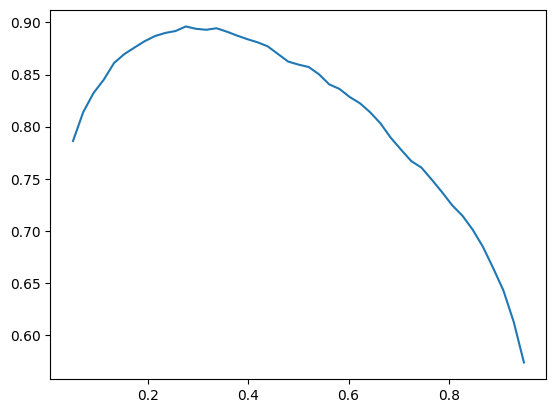

In [83]:
plt.plot(xs, f1scores)

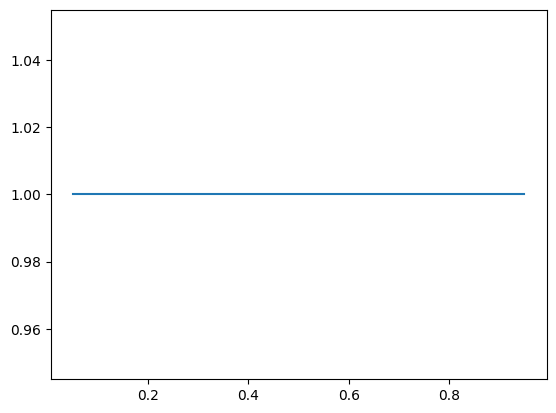

In [ ]:
plt.plot(xs, f1scoresw)

In [153]:
cut_off=[]
for model,preds in zip(pretrained_models,predictions):
    # plt.plot(xs, f1score((final_predictions>i) * 1, final_targets) for i in xs))
    print(model)
    # print(preds)
    # plt.plot(xs,[f1score((preds>i) * 1, final_targets) for i in xs])
    cut = xs[torch.argmax(torch.tensor([f1score((preds>i) * 1, final_targets) for i in xs]))].numpy()
    print(cut)
    cut_off.append(cut)
cut_off

resnet34
0.47954544
resnet50
0.43863636
resnet26d
0.37727273
resnet50d
0.39772725
resnet101d
0.4181818
wide_resnet50_2
0.39772725
wide_resnet101_2
0.37727273
tv_resnet34
0.37727273
xception41
0.37727273
densenet121
0.4590909
densenet169
0.3159091
densenet201
0.39772725
densenet161
0.39772725
efficientnet_b0
0.37727273
efficientnet_b1
0.3363636
efficientnet_b2
0.5409091
efficientnet_b3
0.4181818
inception_resnet_v2
0.29545453
inception_v3
0.37727273
inception_v4
0.3363636


[array(0.47954544, dtype=float32),
 array(0.43863636, dtype=float32),
 array(0.37727273, dtype=float32),
 array(0.39772725, dtype=float32),
 array(0.4181818, dtype=float32),
 array(0.39772725, dtype=float32),
 array(0.37727273, dtype=float32),
 array(0.37727273, dtype=float32),
 array(0.37727273, dtype=float32),
 array(0.4590909, dtype=float32),
 array(0.3159091, dtype=float32),
 array(0.39772725, dtype=float32),
 array(0.39772725, dtype=float32),
 array(0.37727273, dtype=float32),
 array(0.3363636, dtype=float32),
 array(0.5409091, dtype=float32),
 array(0.4181818, dtype=float32),
 array(0.29545453, dtype=float32),
 array(0.37727273, dtype=float32),
 array(0.3363636, dtype=float32)]

In [156]:
for cut in cut_off:
  print(cut)

0.47954544
0.43863636
0.37727273
0.39772725
0.4181818
0.39772725
0.37727273
0.37727273
0.37727273
0.4590909
0.3159091
0.39772725
0.39772725
0.37727273
0.3363636
0.5409091
0.4181818
0.29545453
0.37727273
0.3363636


In [84]:
torch.argmax(torch.tensor(f1scores))

tensor(11)

In [86]:
xs[11]

tensor(0.2750)

In [ ]:
f1scores[20]

0.8976377253297656

In [87]:
test_files = get_image_files(data_folder/'test/test').sorted()

In [88]:
test_dls = [model.dls.test_dl(test_files) for model in ens_model]

In [89]:
test_dls

In [90]:
tta_predictions = []

for model, test_dl in zip(ens_model, test_dls):
    # Perform Test Time Augmentation
    preds, _ = model.tta(dl=test_dl)
    tta_predictions.append(preds * ens_weights_scaled[ens_model.index(model)])

    # w_predictions.append(preds * ens_weights_scaled[ens_model.index(model)])
tta_predictions_w = tta_predictions / torch.sum(tta_predictions, dim=1, keepdim=True)

# Combine predictions from all models
final_tta_predictions = torch.stack(tta_predictions_w).mean(dim=0)

TypeError: ignored

In [175]:
len(tta_predictions[1])

5590

In [161]:
len(tta_predictions[1])

5590

In [163]:
model_folder

Path('/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data')

In [204]:
tta_predictions_scaled = [preds / torch.sum(preds, dim=1, keepdim=True) for preds in tta_predictions]

In [207]:
# sum(tta_predictions_scaled[1][1])

tensor(1.)

In [219]:
for model,preds_ ,cut in zip(pretrained_models,tta_predictions_scaled,cut_off):
    # print(model)
    # print(preds_)
    print(model)
    # pred_decoded = [torch.where(pred>torch.as_tensor(cut))[0] for pred in preds_]
    vocab = learn.dls.vocab
    # print(torch.where(preds_>torch.as_tensor(cut))[0])
    pred_labels_list = [' '.join(vocab[torch.where(pred>torch.as_tensor(cut))[0]]) for pred in preds_]
    # pred_labels = ' '.join(pred_labels_list)
    # print(pred_labels_list)
    # print(pred_labels)
    sample_submission= pd.read_csv(data_folder/'sample_submission.csv')
    sample_submission = sample_submission.sort_values(by = 'image')
    sample_submission['labels'] = pred_labels_list
    sample_submission.to_csv(model_folder.joinpath(model + '_dec5.csv'), index = False)
    # comp = 'inclassplantpathologysmallf23'
    # submission_name = f'{model}_dec5'
    # api.competition_submit(model_folder.joinpath(model + '_dec5.csv'), submission_name, comp)

resnet34
resnet50
resnet26d
resnet50d
resnet101d
wide_resnet50_2
wide_resnet101_2
tv_resnet34
xception41
densenet121
densenet169
densenet201
densenet161
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
inception_resnet_v2
inception_v3
inception_v4


In [215]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,complex
99,test_image_100.jpg,frog_eye_leaf_spot
999,test_image_1000.jpg,scab
1000,test_image_1001.jpg,frog_eye_leaf_spot
...,...,...
994,test_image_995.jpg,powdery_mildew
995,test_image_996.jpg,healthy
996,test_image_997.jpg,healthy
997,test_image_998.jpg,


In [179]:
len(pred_labels)

5590

In [92]:
len(tta_predictions)

20

In [97]:
final_w_predictions

tensor([[1.2396e-04, 1.3566e-04, 1.5872e-03, 8.0074e-04, 8.2052e-05, 4.6578e-02],
        [1.5767e-04, 8.3109e-04, 5.6082e-06, 1.4186e-06, 4.9901e-02, 2.2623e-05],
        [5.2577e-04, 4.9253e-02, 1.1173e-05, 1.7106e-05, 1.3344e-04, 9.3298e-04],
        ...,
        [1.0468e-04, 5.1136e-05, 1.0430e-06, 4.3805e-07, 1.3773e-06, 4.9884e-02],
        [3.2301e-03, 1.1254e-03, 3.2778e-05, 6.9910e-04, 1.2504e-05, 4.6330e-02],
        [8.1148e-05, 1.0953e-04, 1.4923e-05, 3.0551e-06, 1.0863e-05, 4.9852e-02]])

In [98]:
final_tta_predictions = torch.stack(tta_predictions).mean(dim=0)

In [107]:
len(final_tta_predictions)

5590

In [108]:
len(preds)

5590

In [100]:
final_tta_predictions_t = torch.tensor(final_tta_predictions, dtype=torch.float32)
tta_predictions_w = final_tta_predictions_t / torch.sum(final_tta_predictions_t, dim=1, keepdim=True)

<ipython-input-100-010d29ba54fe>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  final_tta_predictions_t = torch.tensor(final_tta_predictions, dtype=torch.float32)


In [102]:
sum(tta_predictions_w[1])

tensor(1.0000)

In [ ]:
torch.where(preds[998]>0.2750)[0]

tensor([2])

In [110]:
pred_decoded = [torch.where(tta_predictions_w>0.5)[0] for pred in tta_predictions_w]
vocab = learn.dls.vocab

In [111]:
vocab

['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']

In [123]:
torch.where(preds>0.275)[0]

tensor([   0,    1,    1,  ..., 5587, 5588, 5589])

In [122]:
torch.where(tta_predictions_w>0.275)[0]

tensor([   0,    1,    1,  ..., 5587, 5588, 5589])

In [124]:
pred_labels = [' '.join(vocab[torch.where(pred>0.275)[0]]) for pred in tta_predictions_w]

In [125]:
len(pred_labels)

5590

In [126]:
pred_labels[0]

'healthy'

In [127]:
pred_labels

['healthy',
 'complex frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'healthy scab',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'complex',
 'complex',
 'scab',
 'healthy',
 'scab',
 'healthy',
 'frog_eye_leaf_spot',
 'scab',
 'scab',
 'complex rust',
 'healthy',
 'healthy',
 'scab',
 'scab',
 'complex',
 'frog_eye_leaf_spot',
 'scab',
 'healthy',
 'scab',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'complex frog_eye_leaf_spot',
 'powdery_mildew',
 'rust',
 'scab',
 'powdery_mildew',
 'scab',
 'powdery_mildew',
 'powdery_mildew',
 'complex frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'healthy',
 'healthy',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot rust',
 'scab',
 'healthy',
 'scab',
 'complex frog_eye_leaf_spot',
 'healthy',
 'scab',
 'rust',
 'healthy',
 'frog_eye_leaf_spot',
 'powdery_mildew scab',
 'frog_eye_leaf_spot',
 'scab',
 'scab',
 'complex frog_eye_leaf_spot',
 'frog_eye_leaf_spot',
 'complex scab',
 'healthy',
 'scab',
 '

In [128]:
sample_submission= pd.read_csv(data_folder/'sample_submission.csv')

In [129]:
sample_submission = sample_submission.sort_values(by = 'image')
sample_submission.head()

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,healthy
99,test_image_100.jpg,healthy
999,test_image_1000.jpg,healthy
1000,test_image_1001.jpg,healthy


In [130]:
sample_submission.shape

(5590, 2)

In [131]:
sample_submission['labels'] = pred_labels

In [ ]:
sample_submission.loc[sample_submission['image'] == 'test_image_999.jpg', 'labels'] = 'healthy'

In [132]:
sample_submission

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,complex frog_eye_leaf_spot
99,test_image_100.jpg,frog_eye_leaf_spot
999,test_image_1000.jpg,healthy scab
1000,test_image_1001.jpg,frog_eye_leaf_spot
...,...,...
994,test_image_995.jpg,powdery_mildew
995,test_image_996.jpg,healthy
996,test_image_997.jpg,healthy
997,test_image_998.jpg,frog_eye_leaf_spot


In [ ]:
sample_submission.iloc[5589]

image     test_image_999.jpg
labels               healthy
Name: 998, dtype: object

In [133]:
sample_submission['labels'].isna().sum()

0

In [134]:
sample_submission.to_csv(model_folder/'ens_w_full_sub.csv', index = False)

In [135]:
comp = 'inclassplantpathologysmallf23'
api.competition_submit(model_folder/'ens_w_full_sub.csv', 'ens_w_full_sub dec05', comp)

100%|██████████| 169k/169k [00:02<00:00, 80.6kB/s] 


Successfully submitted to Inclass_Plant_Pathology_Small_F23